# Homework 5
Noah Kim Section AC

In [45]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
import math
plt.rcParams["figure.figsize"] = (10,6)

The purpose of this homework is to work carefully through a numeric/simulted solution to Bayes' Theorem. Bayes' Theorem reads$$P(signal|data)=\frac{P(data|signal)P(signal)}{P(data)}$$

Effectively the goal of this homework (and the lab) is to find P(signal|data) .

Reading through Bayes' theorem it says that given a data reading, the probability it was produced by a given true signal (P(signal|data)) , is equal to the probability of getting a particular data reading given a certain true signal (P(data|signal)) times the probability of the signal having a particular strength (P(signal)) , divided by the probability of each data reading (P(data)) .

This is just math, so is true. But in practice it is quite subtle how to use this.

### Problem 1

In [46]:
# bkgd = signal free data 
# signal = I chose a signal strength with a SD of 20, A uniform distribution means that the signal is equally likely to be small/faint (near zero) as large/bright (near 20).
# Mathematically this is the P(signal) in the equation
bkgd = stats.norm.rvs(loc=0,scale = 2, size = 1000000)
signal = stats.uniform.rvs(loc=0,scale=20,size=1000000)

Text(0.5, 0, 'Observed data, $P(d|s)$')

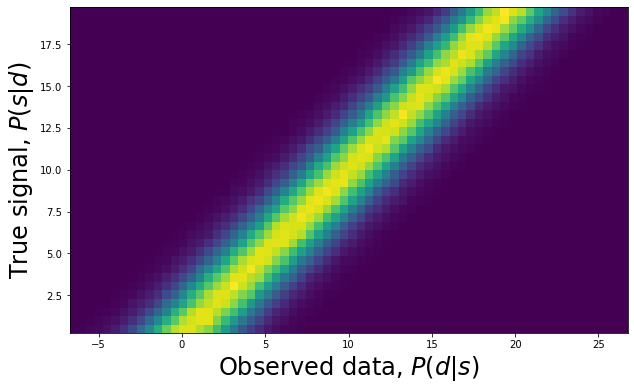

In [47]:
# data = since we know the true signal for each reading we have  P(data|signal)P(signal)
data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

#temp = dataedges temp2 = signaledges Psd: probability s and d in two columns
Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

### 1B)

Select a true injected signal and plot  P(d|s) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it. [Hint: this was also shown in class.]

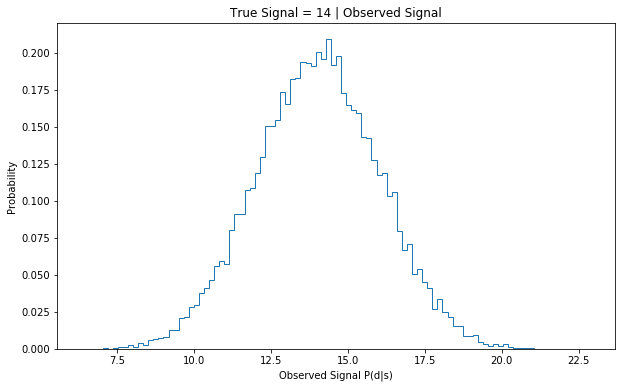

In [61]:
table = pd.DataFrame(columns = ['Background', 'Signal', 'Data'])
table['Data'] = data
table['Signal'] = signal
table['Background'] = bkgd

injected14 = table.query(f'13.8 < Signal < 14.2')
plt.hist(injected14['Data'], bins =100, density = True, histtype='step')
plt.xlabel('Observed Signal P(d|s)')
plt.ylabel('Probability')
plt.title('True Signal = 14 | Observed Signal')
plt.show()

This plot explains the distribution of the data (which encompassing everything such as background noise) after injecting a true signal of 14. Image this plot is a slice horizontally of the 2D histogram plotted at the very beginning with 14 being the true signal value (y-axis). The plot describes the probability of getting a range in which the data lies for a given true signal.

Looking at Bayes' Theorem: $P(signal|data)=\frac{P(data|signal)P(signal)}{P(data)}$

With P(data) being a normalization factor, and the fact that the background distribution is normal, that means $P(signal|data)\propto P(data|signal)$ and therefore when normalized they provide the same histogram.

### 1C)

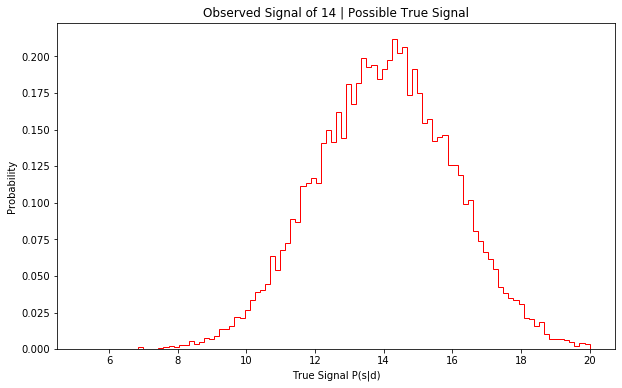

In [63]:
observed14 = table.query(f'13.8 < Data < 14.2')
plt.hist(observed14['Signal'], bins =100, density = True, color = 'r', histtype='step')
plt.xlabel('True Signal P(s|d)')
plt.ylabel('Probability')
plt.title('Observed Signal of 14 | Possible True Signal')
plt.show()

The "observed signal" is the value we observe from the combination of our signal and background
This plot explains the values of true signals if we were to read a data value with a signal of 14 (observed data). Image this plot is a slice vertically of the 2D histogram plotted at the very beginning with 14 being the observed data (x-axis).

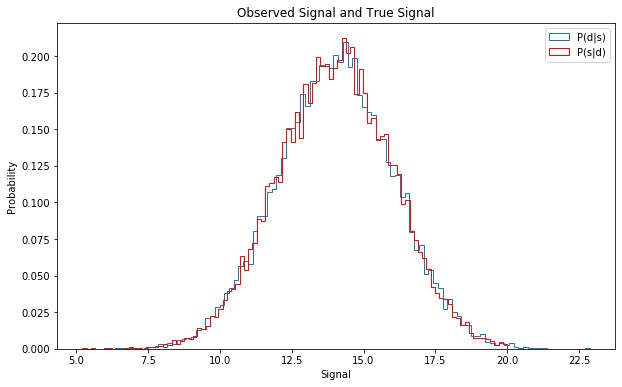

In [60]:
plt.hist(injected14['Data'], bins =100, density = True, histtype='step',label='P(d|s)');
plt.hist(observed14['Signal'], bins =100, density = True, color = 'r', histtype='step',label='P(s|d)');
plt.title('Observed Signal and True Signal')
plt.ylabel('Probability')
plt.xlabel('Signal')
plt.legend()

## Problem 2


Repeat problem 1 but have a background with a non-zero mean. I'm goign to have the background centered at 4. I'm going to keep the same sigma value and random strength interval, 2 and 20.

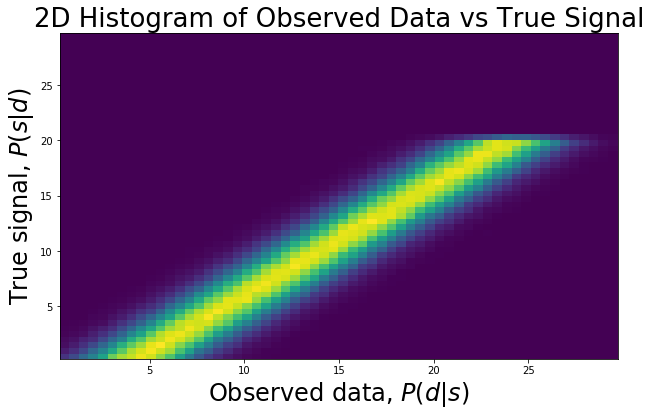

Sigma = 2
Signals of random strengh on the interval of 20
Centered at 4


In [67]:
bkgd = stats.norm.rvs(loc=4,scale=2, size = 1000000)
signal = stats.uniform.rvs(loc=0,scale=20, size = 1000000)
data = bkgd + signal
signaledges = np.linspace(0,30,60)
dataedges = np.linspace(0,30,60)
Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.title("2D Histogram of Observed Data vs True Signal", fontsize = 26)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.show()

print("Sigma = 2")
print("Signals of random strengh on the interval of 20")
print("Centered at 4")

Injecting a signal of 14 with an uncertainty of 0.2

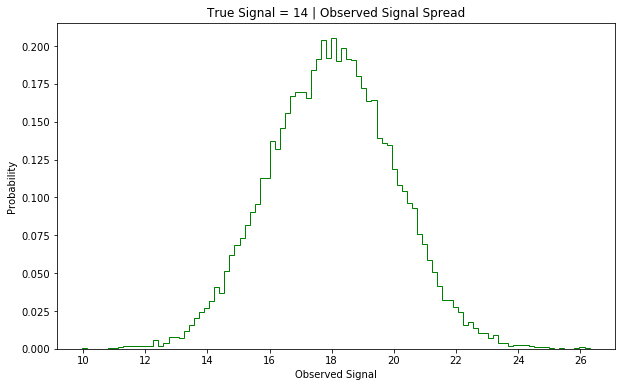

In [68]:
table = pd.DataFrame(columns = ['Background', 'Signal', 'Data'])
table['Data'] = data
table['Signal'] = signal
table['Background'] = bkgd

injected14 = table.query(f'13.8 < Signal < 14.2')
plt.hist(injected14['Data'], bins =100, density = True, color='green', histtype='step')
plt.xlabel('Observed Signal')
plt.ylabel('Probability')
plt.title('True Signal = 14 | Observed Signal Spread')
plt.show()


Above, this means that for any injected true signal equal to 14 relates to seeing a observed signal shown above, which is centered at 18 with a sigma = 2 spread (kept same from above).

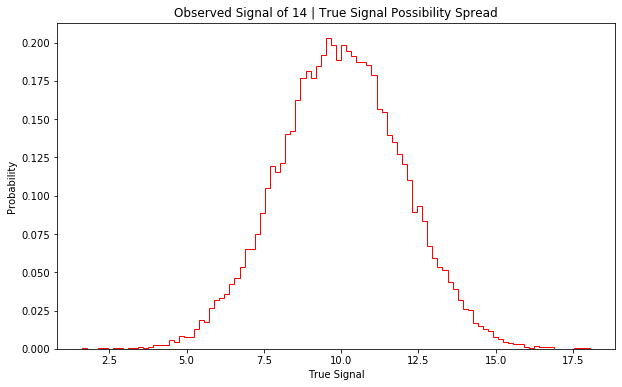

In [69]:
observed14 = table.query(f'13.8 < Data < 14.2')
plt.hist(observed14['Signal'], bins =100, density = True, color = 'r', histtype='step')
plt.xlabel('True Signal')
plt.ylabel('Probability')
plt.title('Observed Signal of 14 | True Signal Possibility Spread')
plt.show()


Above, this means that if we notice the observed value is 14, we can correspond the true signal value to be around 10.

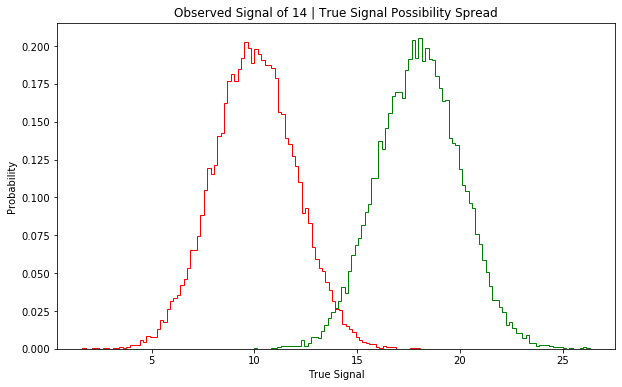

In [71]:
plt.hist(injected14['Data'], bins =100, density = True, histtype='step', color='green')
plt.hist(observed14['Signal'], bins =100, density = True, histtype='step', color='red')
plt.xlabel('True Signal')
plt.ylabel('Probability')
plt.title('Observed Signal of 14 | True Signal Possibility Spread')
plt.show()


Above, we can see the two graphs aren't the same as in problem one. This is because they don't have the same center since the background distirbution average has changed. Now you can see that when we inject a true signal value of 14, they both are offset by four in either direction, which is equal to the average of the background. -4 for observed signal to yield spread of true signal values and +4 for true signal to yield the spread of observed signal. This is because the background does not have an average of 0.